In [47]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [48]:
dir="//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/"

In [50]:
data2025 = ert.load(dir + 'expedition2025_winter/10Mar/p02_h1_ws.txt')
data2024 = ert.load(dir + 'expedition2024/11Aug/p02_h1_ws.tx0')
data_topo = pd.read_csv(dir + 'expedition2025_winter/10Mar/p02_h1_ws_topo.txt', sep='\s+', header=None)


02/06/25 - 11:26:13 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
02/06/25 - 11:26:13 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
02/06/25 - 11:26:13 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
02/06/25 - 11:26:13 - pyGIMLi - INFO - No electrode positions found!
02/06/25 - 11:26:13 - pyGIMLi - INFO - imported:  Data: Electrodes: 48 data: 405


In [41]:
data2024['a']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29,  0

In [26]:
data2025['a'] = (data2025['a'] - data2025['a'].max())*(-1)

In [42]:
data2025['a'] = (data2025['a'] - 47)*(-1)
data2025['b'] = (data2025['b'] - 47)*(-1)
data2025['m'] = (data2025['m'] - 47)*(-1)
data2025['n'] = (data2025['n'] - 47)*(-1)

In [43]:
y_values_reversed = data_topo[1].iloc[::-1].reset_index(drop=True)
x_values_reversed = data_topo[0].iloc[::-1].reset_index(drop=True)

for i in range(data2025.sensorCount()):
    y_new = data_topo[1][i]
    x_new = data_topo[0][i]  
    data2025.setSensorPosition(i, [x_new, y_new])

for i in range(data2024.sensorCount()):
    y_new = data_topo[1][i]
    x_new = data_topo[0][i]  
    data2024.setSensorPosition(i, [x_new, y_new])

In [30]:
pg.x(data2025)

48 [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0]

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1d69916ba50>)

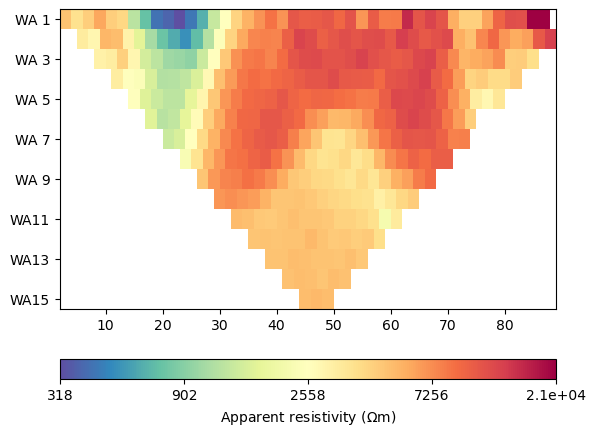

In [51]:
ert.showData(data2025)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1d69aaaa410>)

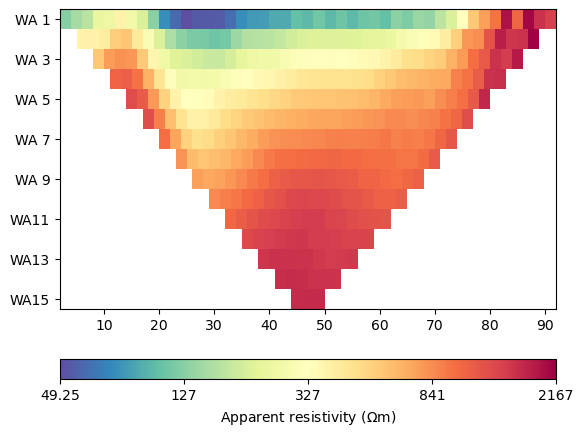

In [52]:
ert.showData(data2024)

In [46]:
data2025.save(dir + 'expedition2025_winter/10Mar/p02_h1_ws.txt', "a b m n err rhoa")

1

In [11]:
data2025.remove(data2025['rhoa']<=0.1)

In [12]:
data2024.remove(data2024['rhoa']<=0.1)

In [94]:
data2024["k"] = ert.createGeometricFactors(data2024, numerical=True)
data2025["k"] = ert.createGeometricFactors(data2025, numerical=True)

21/03/25 - 00:26:44 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.


21/03/25 - 00:26:53 - pyGIMLi - INFO - Save RVector binary
21/03/25 - 00:26:53 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\6932983550104142770
21/03/25 - 00:26:53 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
21/03/25 - 00:27:00 - pyGIMLi - INFO - Save RVector binary
21/03/25 - 00:27:00 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\4525365587914772570


In [95]:
parsons = [data2024, data2025]

In [96]:
tl = ert.TimelapseERT(parsons, paraMaxCellSize=1)

21/03/25 - 00:29:02 - pyGIMLi - INFO - Save RVector binary
21/03/25 - 00:29:02 - pyGIMLi - INFO - Cache stored: C:\Users\Expedition\AppData\Roaming\pygimli\Cache\9075145408554914174


In [99]:
tl.fullInversion(paraMaxCellSize=1, lam=10, verbose=True)

21/03/25 - 00:33:11 - pyGIMLi - INFO - Found 2 regions.
21/03/25 - 00:33:11 - pyGIMLi - INFO - Region with smallest marker (1) set to background


21/03/25 - 00:33:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/03/25 - 00:33:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/03/25 - 00:33:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2047 Cells: 3824 Boundaries: 3002
21/03/25 - 00:33:11 - pyGIMLi - INFO - Starting inversion.


744 model cells
Mesh: Nodes: 2047 Cells: 3824 Boundaries: 3002
fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x00000112F91F1030>
Data transformation: Identity transform
Model transformation: Logarithmic transform
min/max (data): 49.98/2.1e+04
min/max (error): 3%/1.0e+10%
min/max (start model): 1523/1523
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 18226.13
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 2265.22 (dPhi = 87.25%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  282.80 (dPhi = 85.95%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  137.57 (dPhi = 41.30%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  111.81 (dPhi = 18.46%) lam: 10.0
----------------

1488 [1020.9847539675557,...,3262.0955980640742]

array([<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
       <Axes: xlabel='$x$ in m', ylabel='Depth in m'>], dtype=object)

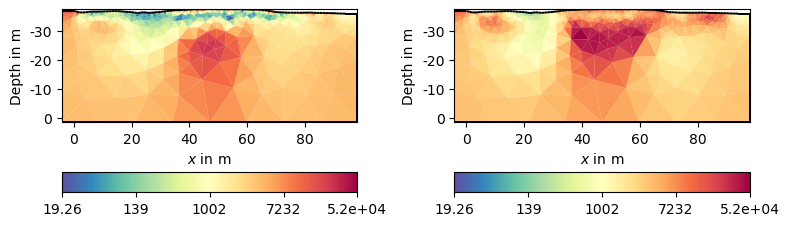

In [114]:
tl.showAllModels()

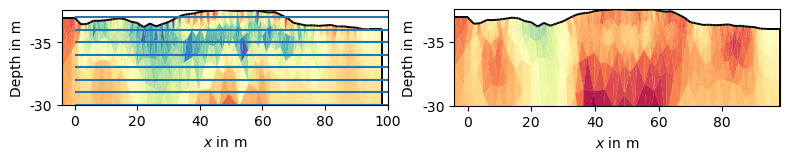

In [112]:
ax = tl.showAllModels(colorBar=False)
ax[0].set_ylim(30)
ax[1].set_ylim(30)
ax[0].set_aspect(4)
ax[1].set_aspect(4)
ax[0].hlines([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 0, 100)
#ax[0].axhline(35)

11/03/25 - 15:18:08 - pyGIMLi - INFO - Found 2 regions.
11/03/25 - 15:18:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/03/25 - 15:18:08 - pyGIMLi - INFO - Found 2 regions.
11/03/25 - 15:18:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/03/25 - 15:18:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
11/03/25 - 15:18:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
11/03/25 - 15:18:09 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 15725 Cells: 31064 Boundaries: 23490
11/03/25 - 15:18:09 - pyGIMLi - INFO - Use median(data values)=5985.833
11/03/25 - 15:18:09 - pyGIMLi - INFO - Created startmodel from forward operator:6665, min/max=5985.833000/5985.833000
11/03/25 - 15:18:09 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002CCB43D3420>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 318/2.1e+04
min/max (error): 0.05%/350%
min/max (start model): 5986/5986
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 6900.26
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 2761.75 (dPhi = 59.94%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  285.44 (dPhi = 89.45%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  114.05 (dPhi = 59.41%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   18.95 (dPhi = 79.79%) lam: 10.0
----------------------------------------------

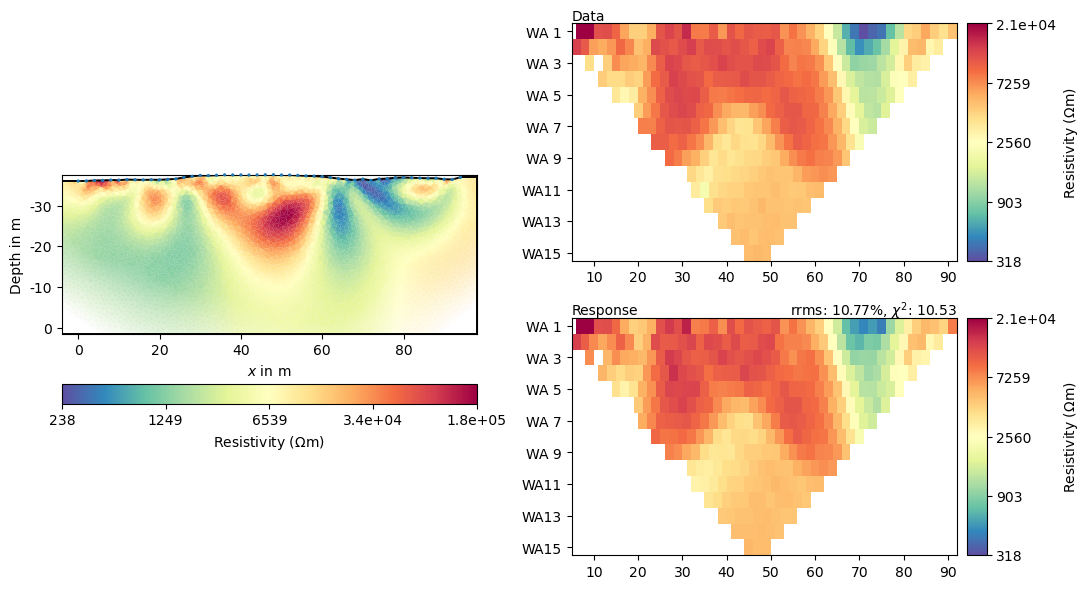

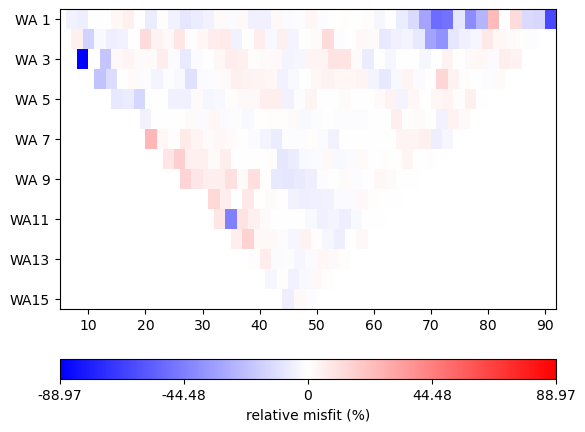

In [33]:
mgr = ert.ERTManager(data)
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10, paraMaxCellSize=1)
mgr.showResultAndFit()
mgr.showMisfit()

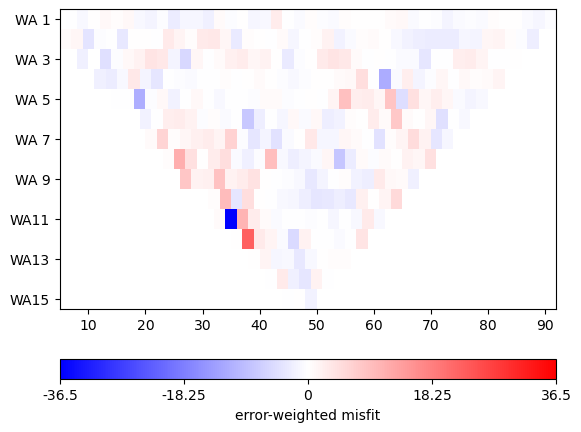

In [26]:
mgr.showMisfit(errorWeighted=True)

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x2ccafc2cd90>)

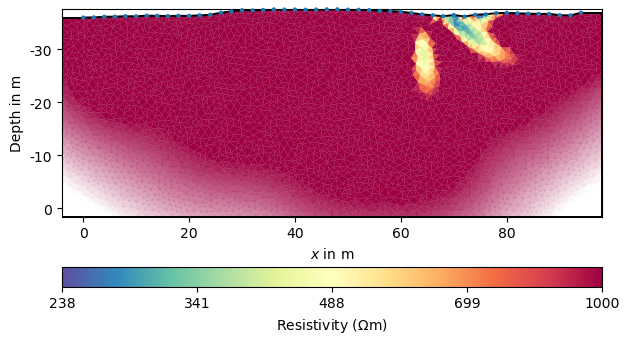

In [39]:
mgr.showResult(cMax=1000)